<a href="https://colab.research.google.com/github/Kaustubh-20/ML_Practice/blob/main/Sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import re
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
dataset = pd.read_csv('/content/IPL2020_Tweets.csv')

In [ ]:

dataset.shape

(88875, 15)

In [ ]:

dataset.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet', 'month', 'year'],
      dtype='object')

In [ ]:
dataset.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,month,year
0,GAURAV DHANAWAT 🇮🇳,"Delhi,India",Live EVS Operator/Coordinator | EX Ten Sports ...,02/04/09 17:06,147.0,127.0,205.0,False,2020-11-11,Time to change the Bubble from #IPL2020 to #IS...,"['IPL2020', 'ISL2020']",Twitter for iPhone,False,11.0,2020.0
1,🇮🇳🇮🇳 शुभम दोहरे 🇮🇳🇮🇳,"Bhopal, India",👉💯%Bhopali😎\n👉B+🔥\n👉Proud to be an #indian🇮🇳\n...,10/11/16 5:09,113.0,699.0,1412.0,False,2020-11-11,Why is #2020Fixing trending?? \n\nI think rcb ...,['2020Fixing'],Twitter for Android,False,11.0,2020.0
2,Steven Gordon,"Carrickfergus, Northern Irelan","Buns are good but puns are better, best served...",03/04/13 15:03,27.0,57.0,41.0,False,2020-11-11,@ICC And still #rajasthanroyals finished last...,"['rajasthanroyals', 'JofraArcher', 'RR', 'jofr...",Twitter for Android,False,11.0,2020.0
3,Bhumish Patel,Montreal Canada,"Student at Concordia University, Montreal, CA\...",04/07/13 16:24,131.0,1525.0,10343.0,False,2020-11-11,I still remember the bus parade after @mipalta...,NaN,Twitter Web App,False,11.0,2020.0
4,cricket22yards,NaN,We are a cricketing blog highly focusing on th...,02/09/16 19:14,551.0,189.0,160.0,False,2020-11-11,"#IPL2020 \n\nSTATS: Most runs, fastest fifties...",['IPL2020'],Twitter Web App,False,11.0,2020.0


In [ ]:
dataset['cleaned_tweet'] = dataset['text'].apply(lambda x: x.lower() if isinstance(x, str) else '')


In [ ]:
dataset['cleaned_tweet'] = dataset['cleaned_tweet'].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x, flags=re.MULTILINE) if isinstance(x, str) else '')


In [ ]:
dataset['cleaned_tweet'] = dataset['cleaned_tweet'].apply(lambda x: re.sub(r'@\S+|#\S+', '', x) if isinstance(x, str) else '')


In [ ]:
dataset['cleaned_tweet'] = dataset['cleaned_tweet'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)) if isinstance(x, str) else '')


In [ ]:
dataset['tokenized_tweet'] = dataset['cleaned_tweet'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else [])

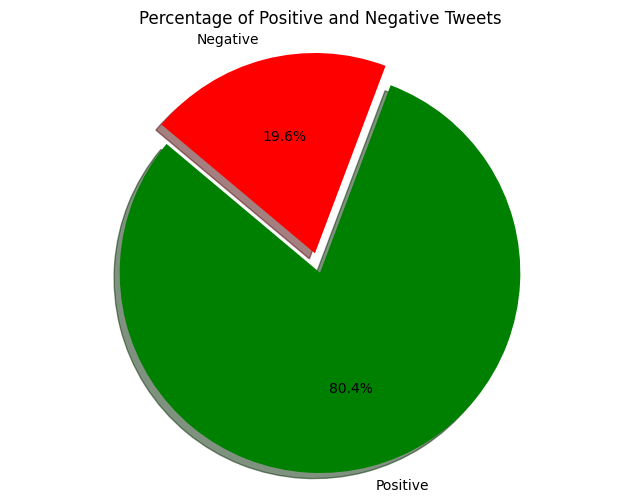

In [ ]:
from textblob import TextBlob

def analyze_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

dataset['sentiment_score'] = dataset['cleaned_tweet'].apply(analyze_sentiment)

positive_tweets = dataset[dataset['sentiment_score'] > 0]
negative_tweets = dataset[dataset['sentiment_score'] < 0]

total_tweets = len(dataset)
positive_percentage = (len(positive_tweets) / total_tweets) * 100
negative_percentage = (len(negative_tweets) / total_tweets) * 100

labels = ['Positive', 'Negative']
sizes = [positive_percentage, negative_percentage]
colors = ['Green', 'Red']
explode = (0.1, 0)
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Positive and Negative Tweets')
plt.axis('equal')
plt.show()


In [ ]:

print("Examples of Negative Tweets:")
for i, tweet in enumerate(negative_tweets['cleaned_tweet'].head(10), start=1):
    print(f"Negative Tweet {i}: {tweet}")
    print()


Examples of Negative Tweets:
Negative Tweet 1: i still remember the bus parade after  won the ipl2019. i went to see the champions after work. 😅  well, a… 

Negative Tweet 2: the man behind all this i.e.  is you! without your leadership it was almost impossible! take a 🙇‍♀️… 

Negative Tweet 3: jos buttler prefers opening the batting in t20 cricket - but says it was his idea to move down the order for  in 

Negative Tweet 4: if you thought the altroz was bad in  then wait till you see what  will be like next year......… 

Negative Tweet 5:  ji was so true during  final when he said that franchisees are so obsessed with eng and aus… 

Negative Tweet 6: see, this moron has omitted to mention the name of  chief  in his thanksgiving tweet. this is inten… 

Negative Tweet 7: why did bcci hold the women’s ipl.. not enough matches.. wasn’t it just a farce..  

Negative Tweet 8: "morgan was habitually consistent rather than frighteningly explosive."

 on england's  star… 

Negative Tweet 9: “d